In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

c:\Users\prath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('historic_data/csv/TCS.NS.csv')

split_index = int(0.8 * len(data))
train = data[:split_index]
test = data[split_index:]

In [ ]:
train.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-08-2002,38.724998,38.724998,212976.0,40.000000,39.700001,28.484991
1,13-08-2002,38.875000,39.750000,153576.0,40.387501,39.162498,28.099339
2,14-08-2002,35.724998,39.250000,822776.0,39.250000,36.462502,26.162067
3,15-08-2002,36.462502,36.462502,0.0,36.462502,36.462502,26.162067
4,16-08-2002,35.750000,36.275002,811856.0,38.000000,36.375000,26.099293


In [ ]:
train_open= train.iloc[:, 1:2].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [ ]:
train_open_scaled[60]

array([0.0020738])

In [ ]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(4050, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
135/135 [==============================] - 34s 144ms/step - loss: nan
Epoch 2/100
135/135 [==============================] - 19s 139ms/step - loss: nan
Epoch 3/100
135/135 [==============================] - 20s 150ms/step - loss: nan
Epoch 4/100
135/135 [==============================] - 20s 150ms/step - loss: nan
Epoch 5/100
135/135 [==============================] - 20s 147ms/step - loss: nan
Epoch 6/100
135/135 [==============================] - 20s 151ms/step - loss: nan
Epoch 7/100
135/135 [==============================] - 20s 151ms/step - loss: nan
Epoch 8/100
135/135 [==============================] - 20s 145ms/step - loss: nan
Epoch 9/100
135/135 [==============================] - 19s 139ms/step - loss: nan
Epoch 10/100
135/135 [==============================] - 19s 139ms/step - loss: nan
Epoch 11/100
135/135 [==============================] - 19s 138ms/step - loss: nan
Epoch 12/100
135/135 [==============================] - 19s 144ms/step - loss: nan
Epoch 13/100


In [11]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [12]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [13]:
xtest= np.array(xtest)
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value)

1/1 [==============================] - 6s 6s/step


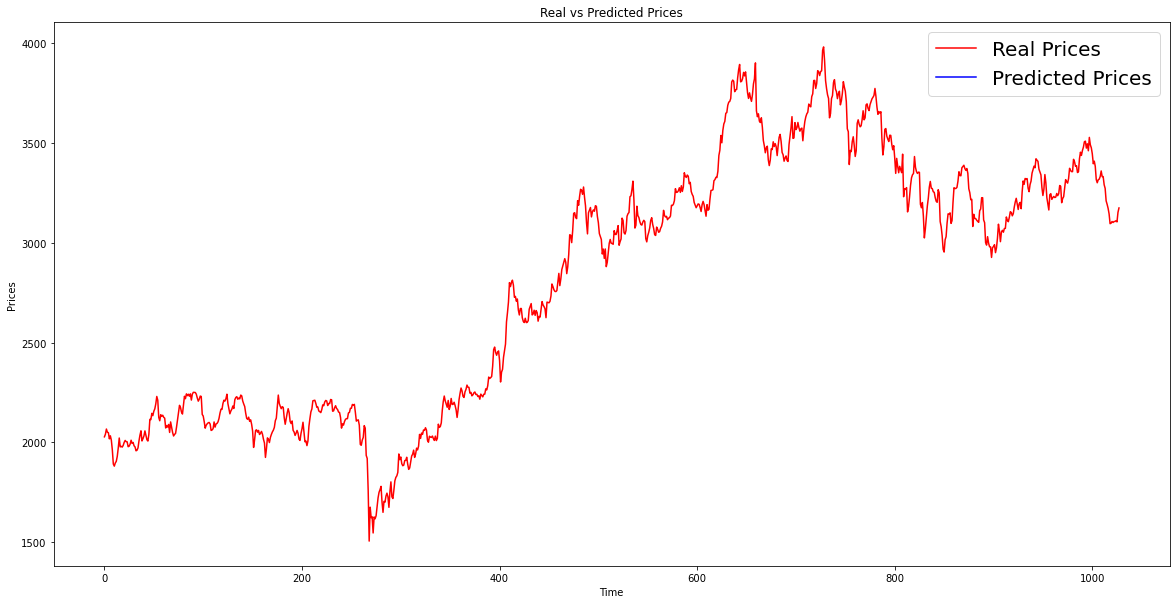

In [14]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [15]:
from keras.wrappers.scikit_learn import KerasRegressor

In [16]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

C:\Users\prath\AppData\Local\Temp\ipykernel_45044\2440103601.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=reg)


In [17]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
102/102 [==============================] - 40s 185ms/step - loss: nan
Epoch 2/50
102/102 [==============================] - 25s 245ms/step - loss: nan
Epoch 3/50
102/102 [==============================] - 28s 270ms/step - loss: nan
Epoch 4/50
102/102 [==============================] - 27s 268ms/step - loss: nan
Epoch 5/50
102/102 [==============================] - 24s 238ms/step - loss: nan
Epoch 6/50
102/102 [==============================] - 30s 293ms/step - loss: nan
Epoch 7/50
102/102 [==============================] - 26s 251ms/step - loss: nan
Epoch 8/50
102/102 [==============================] - 24s 231ms/step - loss: nan
Epoch 9/50
102/102 [==============================] - 18s 176ms/step - loss: nan
Epoch 10/50
102/102 [==============================] - 18s 172ms/step - loss: nan
Epoch 11/50
102/102 [==============================] - 18s 177ms/step - loss: nan
Epoch 12/50
102/102 [==============================] - 21s 207ms/step - loss: nan
Epoch 13/50
102/102 [====

1/1 [==============================] - 2s 2s/step


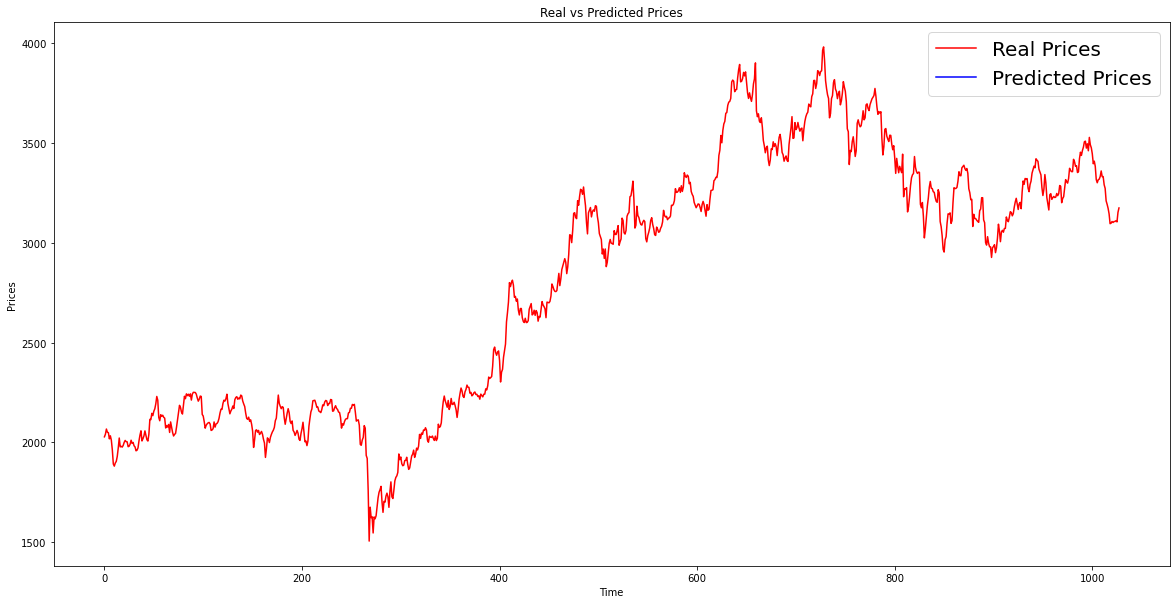

In [ ]:
model

predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)